## Лабораторная работа по курсу "Искусственный интеллект"
## Многослойный персептрон

| Студент | Ежов |
|---------|------|
| Группа  | 7    |



Необходимые в данной работе inputs:

In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import tensorflow as tf
import numpy as np
from Net import bar_dataset_info
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
def plot_progress(model, test_dataset, test_labels, h):
    fig, ax = plt.subplots(2, 1)
    ax[0].plot(h.history['accuracy'], 'g-')
    ax[0].plot(h.history['val_accuracy'], 'k--')
    ax[0].legend(ax[0].lines, ['training accuracy', 'validation accuracy'],
              loc='upper center', ncol=2)

    ax[1].plot(h.history['loss'], 'g-')
    ax[1].plot(h.history['val_loss'], 'k--')
    ax[1].legend(ax[1].lines, ['training loss', 'validation loss'],
              loc='upper center', ncol=2)
    
    pred = np.argmax(model.predict(test_dataset), axis=1)
    print(ConfusionMatrixDisplay.from_predictions(test_labels, pred))

Используем функцию keras, которая позволяет загружать датасет MNIST и посмотрим на то, какие данные она нам отдаёт

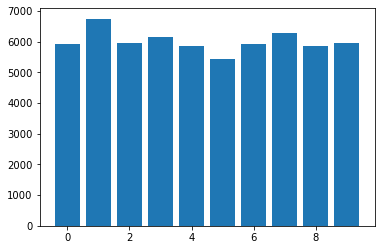

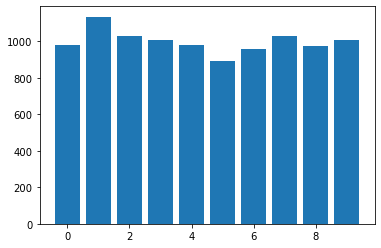

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [3]:
(train_x, train_labels), (test_x, test_labels) = tf.keras.datasets.mnist.load_data()

bar_dataset_info(train_labels).show()
bar_dataset_info(test_labels).show()

train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

print(train_x.shape)
print(test_x.shape)

print(train_labels.shape)
print(test_labels.shape)

После разделения выборки создадим первую модель с одним слоем - линейным. Для обучения будем использовать функции из Keras, чтобы уменьшить его количество и упростить задачу

In [4]:
train_x = tf.math.l2_normalize(train_x, 1)
test_x = tf.math.l2_normalize(test_x, 1)

train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_labels.astype(np.float32)))
train_dataset = train_dataset.batch(8)

test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_labels.astype(np.float32)))
test_dataset = test_dataset.batch(8)


2022-05-10 16:20:23.172645: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-10 16:20:23.173005: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-10 16:20:23.173226: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

Мы используем слой Flatten, чтобы наши N-мерные тензоры стали одномерными, в таком случае мы можем не заниматься дополнительной подготовкой данных, например, делать reshape

In [6]:
model.add(tf.keras.layers.Dense(10, activation='softmax', input_dim=28*28))
model.compile(tf.keras.optimizers.Adam(0.01),'sparse_categorical_crossentropy',['accuracy'])
h = model.fit(train_dataset,validation_data=test_dataset,epochs=5)
model.summary()

Epoch 1/5


2022-05-10 16:20:24.378756: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-05-10 16:20:24.380236: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2593905000 Hz


7500/7500 [==============================] - 18s 2ms/step - loss: 0.4218 - accuracy: 0.8790 - val_loss: 0.4010 - val_accuracy: 0.8937
Epoch 2/5
7500/7500 [==============================] - 17s 2ms/step - loss: 0.3331 - accuracy: 0.9101 - val_loss: 0.4052 - val_accuracy: 0.8961
Epoch 3/5
7500/7500 [==============================] - 17s 2ms/step - loss: 0.3238 - accuracy: 0.9136 - val_loss: 0.4131 - val_accuracy: 0.8981
Epoch 4/5
7500/7500 [==============================] - 17s 2ms/step - loss: 0.3190 - accuracy: 0.9152 - val_loss: 0.4213 - val_accuracy: 0.8981
Epoch 5/5
7500/7500 [==============================] - 17s 2ms/step - loss: 0.3162 - accuracy: 0.9168 - val_loss: 0.4295 - val_accuracy: 0.8967
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense 

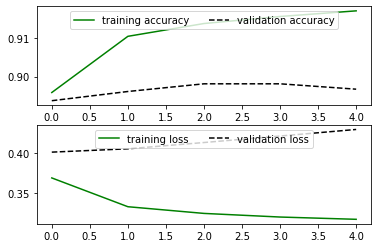

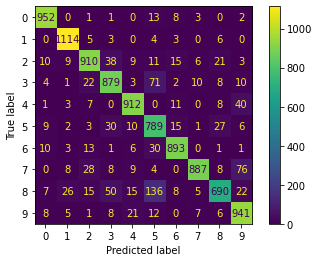

In [7]:
plot_progress(model, test_dataset, test_labels, h)

Epoch 1/5
7500/7500 [==============================] - 18s 2ms/step - loss: 1.7995 - accuracy: 0.5415 - val_loss: 0.6875 - val_accuracy: 0.8405
Epoch 2/5
7500/7500 [==============================] - 18s 2ms/step - loss: 0.6148 - accuracy: 0.8513 - val_loss: 0.4571 - val_accuracy: 0.8805
Epoch 3/5
7500/7500 [==============================] - 18s 2ms/step - loss: 0.4469 - accuracy: 0.8792 - val_loss: 0.3857 - val_accuracy: 0.8954
Epoch 4/5
7500/7500 [==============================] - 19s 2ms/step - loss: 0.3874 - accuracy: 0.8920 - val_loss: 0.3509 - val_accuracy: 0.9036
Epoch 5/5
7500/7500 [==============================] - 18s 2ms/step - loss: 0.3559 - accuracy: 0.8994 - val_loss: 0.3300 - val_accuracy: 0.9083
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
____________________________________________________________

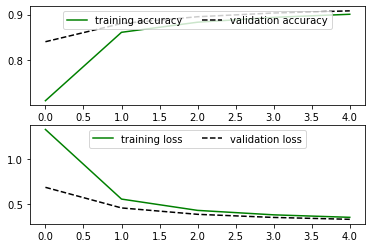

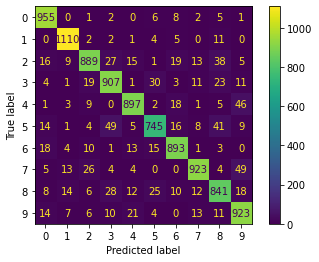

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='sigmoid', input_dim=28*28))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(tf.keras.optimizers.SGD(0.01),'sparse_categorical_crossentropy',['accuracy'])
h = model.fit(train_dataset,validation_data=test_dataset,epochs=5)
model.summary()

plot_progress(model, test_dataset, test_labels, h)

Epoch 1/5
7500/7500 [==============================] - 19s 3ms/step - loss: 0.9921 - accuracy: 0.7597 - val_loss: 0.3347 - val_accuracy: 0.9055
Epoch 2/5
7500/7500 [==============================] - 18s 2ms/step - loss: 0.3233 - accuracy: 0.9075 - val_loss: 0.2783 - val_accuracy: 0.9212
Epoch 3/5
7500/7500 [==============================] - 19s 2ms/step - loss: 0.2715 - accuracy: 0.9227 - val_loss: 0.2458 - val_accuracy: 0.9300
Epoch 4/5
7500/7500 [==============================] - 18s 2ms/step - loss: 0.2372 - accuracy: 0.9329 - val_loss: 0.2213 - val_accuracy: 0.9361
Epoch 5/5
7500/7500 [==============================] - 18s 2ms/step - loss: 0.2107 - accuracy: 0.9407 - val_loss: 0.2014 - val_accuracy: 0.9418
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
____________________________________________________________

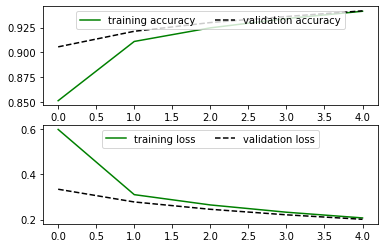

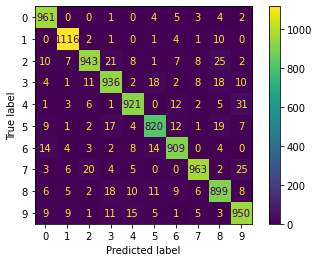

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu', input_dim=28*28))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(tf.keras.optimizers.SGD(0.01),'sparse_categorical_crossentropy',['accuracy'])
h = model.fit(train_dataset,validation_data=test_dataset,epochs=5)
model.summary()

plot_progress(model, test_dataset, test_labels, h)

Epoch 1/5
7500/7500 [==============================] - 23s 3ms/step - loss: 0.9299 - accuracy: 0.7884 - val_loss: 0.3191 - val_accuracy: 0.9116
Epoch 2/5
7500/7500 [==============================] - 23s 3ms/step - loss: 0.3063 - accuracy: 0.9124 - val_loss: 0.2588 - val_accuracy: 0.9274
Epoch 3/5
7500/7500 [==============================] - 24s 3ms/step - loss: 0.2502 - accuracy: 0.9291 - val_loss: 0.2246 - val_accuracy: 0.9352
Epoch 4/5
7500/7500 [==============================] - 23s 3ms/step - loss: 0.2148 - accuracy: 0.9388 - val_loss: 0.1998 - val_accuracy: 0.9434
Epoch 5/5
7500/7500 [==============================] - 22s 3ms/step - loss: 0.1884 - accuracy: 0.9465 - val_loss: 0.1803 - val_accuracy: 0.9479
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
____________________________________________________________

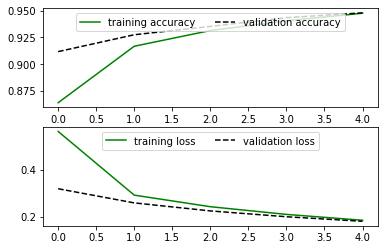

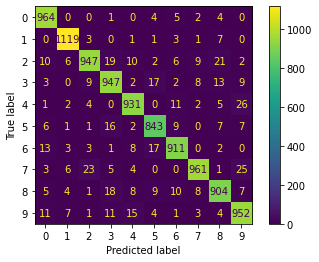

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500, activation='relu', input_dim=28*28))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(tf.keras.optimizers.SGD(0.01),'sparse_categorical_crossentropy',['accuracy'])
h = model.fit(train_dataset,validation_data=test_dataset,epochs=5)
model.summary()

plot_progress(model, test_dataset, test_labels, h)

Теперь скачаем и сделаем анализ датасета FashionMNIST

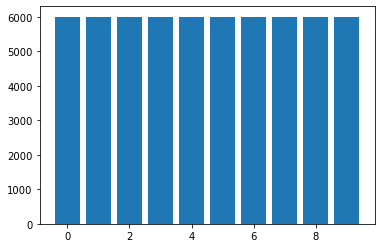

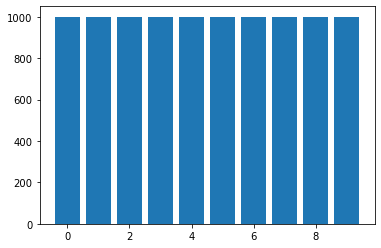

(60000, 28, 28)
(10000, 28, 28)


In [11]:
(train_x, train_labels), (test_x, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

bar_dataset_info(train_labels).show()
bar_dataset_info(test_labels).show()

train_x = train_x.astype('float32')
test_x = test_x.astype('float32')


print(train_x.shape)
print(test_x.shape)

In [12]:
train_x = tf.math.l2_normalize(train_x, 1)
test_x = tf.math.l2_normalize(test_x, 1)

train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_labels.astype(np.float32)))
train_dataset = train_dataset.batch(8)

test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_labels.astype(np.float32)))
test_dataset = test_dataset.batch(8)

Epoch 1/5
7500/7500 [==============================] - 20s 3ms/step - loss: 0.9680 - accuracy: 0.6766 - val_loss: 0.4930 - val_accuracy: 0.8243
Epoch 2/5
7500/7500 [==============================] - 19s 3ms/step - loss: 0.4555 - accuracy: 0.8378 - val_loss: 0.4446 - val_accuracy: 0.8404
Epoch 3/5
7500/7500 [==============================] - 18s 2ms/step - loss: 0.4053 - accuracy: 0.8530 - val_loss: 0.4185 - val_accuracy: 0.8522
Epoch 4/5
7500/7500 [==============================] - 18s 2ms/step - loss: 0.3736 - accuracy: 0.8642 - val_loss: 0.4001 - val_accuracy: 0.8586
Epoch 5/5
7500/7500 [==============================] - 18s 2ms/step - loss: 0.3504 - accuracy: 0.8722 - val_loss: 0.3867 - val_accuracy: 0.8617
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
____________________________________________________________

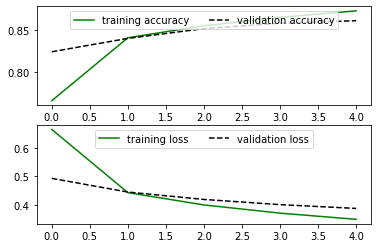

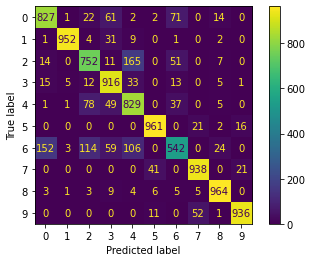

In [13]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu', input_dim=28*28))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(tf.keras.optimizers.SGD(0.01),'sparse_categorical_crossentropy',['accuracy'])
h = model.fit(train_dataset,validation_data=test_dataset,epochs=5)
model.summary()

plot_progress(model, test_dataset, test_labels, h)

Epoch 1/5
7500/7500 [==============================] - 22s 3ms/step - loss: 0.6041 - accuracy: 0.7808 - val_loss: 0.4590 - val_accuracy: 0.8381
Epoch 2/5
7500/7500 [==============================] - 23s 3ms/step - loss: 0.3641 - accuracy: 0.8631 - val_loss: 0.4076 - val_accuracy: 0.8535
Epoch 3/5
7500/7500 [==============================] - 22s 3ms/step - loss: 0.3214 - accuracy: 0.8786 - val_loss: 0.3841 - val_accuracy: 0.8621
Epoch 4/5
7500/7500 [==============================] - 22s 3ms/step - loss: 0.2944 - accuracy: 0.8887 - val_loss: 0.3746 - val_accuracy: 0.8672
Epoch 5/5
7500/7500 [==============================] - 21s 3ms/step - loss: 0.2749 - accuracy: 0.8948 - val_loss: 0.3749 - val_accuracy: 0.8689
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
____________________________________________________________

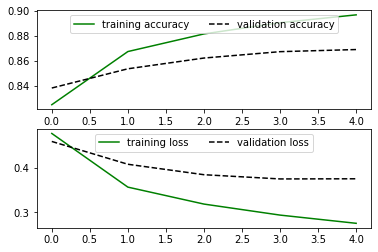

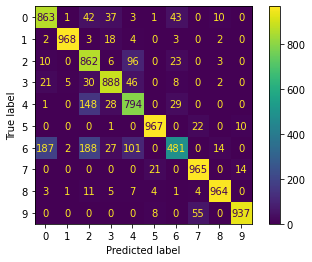

In [14]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu', input_dim=28*28))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(tf.keras.optimizers.Adam(0.001),'sparse_categorical_crossentropy',['accuracy'])
h = model.fit(train_dataset,validation_data=test_dataset,epochs=5)
model.summary()

plot_progress(model, test_dataset, test_labels, h)

Теперь скачаем и сделаем анализ для датасета CIFAR-10

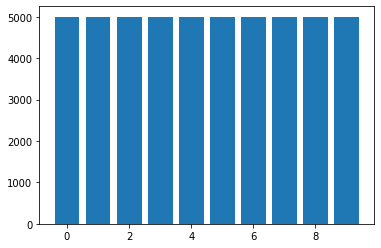

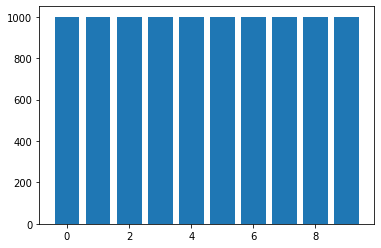

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [18]:
(train_x, train_labels), (test_x, test_labels) = tf.keras.datasets.cifar10.load_data()

bar_dataset_info(train_labels).show()
bar_dataset_info(test_labels).show()

train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

train_labels = train_labels.astype('float32')
test_labels = test_labels.astype('float32')

print(train_x.shape)
print(test_x.shape)

In [19]:
train_x = tf.math.l2_normalize(train_x, 2)
test_x = tf.math.l2_normalize(test_x, 2)

train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_labels))
train_dataset = train_dataset.batch(10)

test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_labels))
test_dataset = test_dataset.batch(10)

Размер датасета, похоже, оказался слишком большим, т.к. при попытке нормализовать целиком данные или просто построить из них объект типа Dataset - ядро падало.
Поэтому будем подавать нашей сети данные в формате тензоров
UPD: Похоже, проблема была в самом Github Codespaces, потому что ядро постоянно крашилось вне зависимости от различных ухищерений.
В итоге было решено сделать только одну модель для CIFAR-10, которая была обучена на моём ПК.

Epoch 1/15
5000/5000 [==============================] - 26s 5ms/step - loss: 2.0983 - accuracy: 0.2310 - val_loss: 1.9746 - val_accuracy: 0.2845
Epoch 2/15
5000/5000 [==============================] - 29s 6ms/step - loss: 1.9341 - accuracy: 0.3007 - val_loss: 1.8995 - val_accuracy: 0.3164
Epoch 3/15
5000/5000 [==============================] - 26s 5ms/step - loss: 1.8454 - accuracy: 0.3366 - val_loss: 1.8482 - val_accuracy: 0.3348
Epoch 4/15
5000/5000 [==============================] - 25s 5ms/step - loss: 1.7766 - accuracy: 0.3640 - val_loss: 1.8095 - val_accuracy: 0.3519
Epoch 5/15
5000/5000 [==============================] - 27s 5ms/step - loss: 1.7182 - accuracy: 0.3861 - val_loss: 1.7593 - val_accuracy: 0.3751
Epoch 6/15
5000/5000 [==============================] - 24s 5ms/step - loss: 1.6665 - accuracy: 0.4060 - val_loss: 1.7341 - val_accuracy: 0.3828
Epoch 7/15
5000/5000 [==============================] - 25s 5ms/step - loss: 1.6219 - accuracy: 0.4245 - val_loss: 1.7112 - val_ac

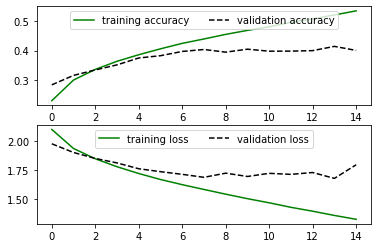

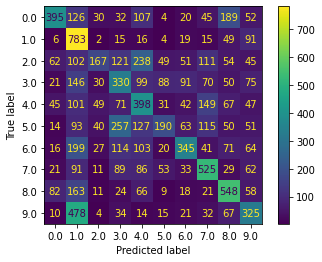

In [29]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,kernel_initializer='random_normal', activation='relu', input_dim=32*32*3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(tf.keras.optimizers.SGD(learning_rate=0.01),'sparse_categorical_crossentropy',['accuracy'])
h = model.fit(train_dataset,validation_data=test_dataset,epochs=15)
model.summary()

plot_progress(model, test_dataset, test_labels, h)

Как можно заметить, при таком большом количестве эпох можно наблюдать процесс переобучения нашей модели, когда на обучающих данных точность становится всё выше, но при валидации в определённый момент показатели перестают улучшаться